## Lecture 2 (Week 4): Plotting
## Based on Spring 2019 Lectures

Topic coverage: 

* Plotting with Matplotlib
    * Plotting basics review and extension
        - plot()
            - can use lists or arrays
            - format strings ('b--', 'g^', etc.)
            - automatically creates a figure if one doesn't exist
                - otherwise makes new 'axes' on active figure
        - figure()
            - used to make new figure and make existing ones active
                - e.g., figure(2) creates Figure 2, or makes Figure 2 active if it already exists.
        - subplot() and add_subplot()
            - for making subplots and adding subplots to figures
            - basic example of working with axes objects
                - (important, because most gallery examples make plots by using methods of axes objects)
                - adding plots to them
                - drawing things on them
                - getting and setting limits
        - matplotlib documentation and gallery
                
* Input/Output
    * Reading from the prompt
    * Reading from the command line
    * File input/output

    

## Rehash: lists vs arrays 

Any computing language defines more complex data structures, which aggregate individual data into a single container. 

The simplest such data structure is an **array**, which holds a fixed number of elements of a single type, usually in a contiguous region in memory. 
Individual array elements can be indexed; first index in Python and other C-like languages is 0
Arrays can be multi-dimensional, although they are always "unrolled" into a 1d structure in computer memory

Another sequential structure is a **linked list**, which is more dynamic, i.e. allows one to insert, remove, and append elements with little overhead.


Third common structure is a **dictionary**, which is often implemented as a **hash table** (e.g. in Python) or a **tree** (e.g. in C++ STL)

In [1]:
# import numpy as np
# a = np.array([1,2,3,4,5])
a = [1,2,3,4,5] # This can be done with a list (as shown here) or with an array
print (a[0],a[4])
for i in a:
    print (i)

1 5
1
2
3
4
5


In [2]:
print (len(a))   # how long is an array ? 

5


In [12]:
import numpy as np
m = np.ndarray(shape=(5,4),dtype=float)  # unitialized array # The N-dimensional array
print(m)
m[:,:] = 0
m += 5   # take current values of m, increment by 5
m[1:3,2] = 10 # 1:3 means "from 1 up to but not including 3"
print()
print(m)

[[ 5.  5.  5.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]]

[[ 5.  5.  5.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]]


More on matrix operations in Week 12, when we discuss linear algebra

In [13]:
v = np.array([1,2,3])
w = np.array([-3,3,-1])
print (v*w)  
print (v.dot(w))     # now we can do linear algebra !

[-3  6 -3]
0


### Lists

Lists are also enumerable data sets, but they can accommodate mixed data types. The data are not contiguous in memory, so iterating over the lists is slower than over arrays. On the other hand, changing the size of the list is faster than the size of the array (e.g. insert or delete elements). 

In [15]:
l = [2,4,5,'Apple']
print(l[0],l[3],len(l))
print()
for element in l:
    print (element, type(element))
    

2 Apple 4

2 <class 'int'>
4 <class 'int'>
5 <class 'int'>
Apple <class 'str'>


## Plotting with Matplotlib

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

Let's look at an example

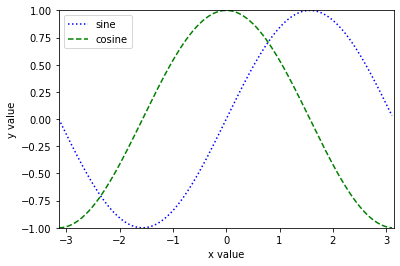

In [16]:
from pylab import * # import all functions from numpy, scipy, and matplotlib. Beware ! Overloads functions like sqrt, sin

# make plots inline
%matplotlib inline
x = arange(-pi, pi, pi/100)   # create an array of x values
plot(x, sin(x), 'b:', label='sine' )   # plot arrays x and sin(x), in blue, solid line
plot(x, cos(x), 'g--', label='cosine' )
xlabel('x value' )
ylabel('y value' )
xlim(-pi, pi)
ylim(-1, 1)
legend(loc='upper left')
show()

Actually, plot is a very flexible command. Arguments can any sequential data types (e.g. lists), although internally they are converted into arrays. Attributes can be set on the command line or separately (see below). 

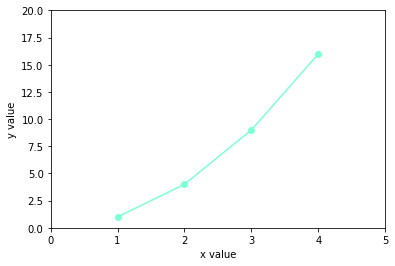

In [17]:
plot([1,2,3,4], [1,4,9,16], marker='o', color='aquamarine')
axis([0, 5, 0, 20])
xlabel('x value' )
ylabel('y value' )
show()

#### Line and marker attributes

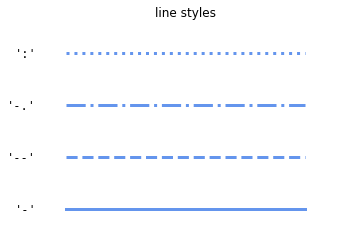

In [18]:
"""
Reference for line-styles included with Matplotlib (http://matplotlib.org/)
"""
import numpy as np
import matplotlib.pyplot as plt

color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()

def nice_repr(text):
    return repr(text).lstrip('u')

# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5, y, nice_repr(linestyle), **text_style)
    ax.plot(y * points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line styles')

plt.show()

#### Colors

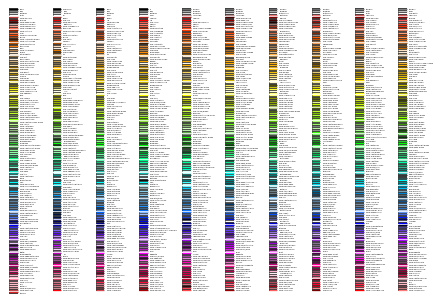

In [19]:
"""
Visualization of named colors (http://matplotlib.org/)

Simple plot example with the named colors and its visual representation.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import six

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

colors_ = list(six.iteritems(colors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(colors.ColorConverter.colors):
    hex_ = colors.rgb2hex(rgb)
    colors_.append((name, hex_))

# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [colors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [colors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

n = len(sorted_colors)
ncols = 10
nrows = int(np.ceil(1. * n / ncols))

fig, ax = plt.subplots()

X, Y = fig.get_dpi() * fig.get_size_inches()

# row height
h = Y / (nrows + 1)
# col width
w = X / ncols

for i, (name, color) in enumerate(sorted_colors):
    col = i % ncols
    row = int(i / ncols)
    y = Y - (row * h) - h
    
    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    # Add extra black line a little bit thicker to make
    # clear colors more visible.
    ax.hlines(y, xi_line, xf_line, color='black', linewidth=(h * 0.7))
    ax.hlines(y + h * 0.1, xi_line, xf_line, color=color, linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.savefig("colors.pdf")
plt.show()

## Markers

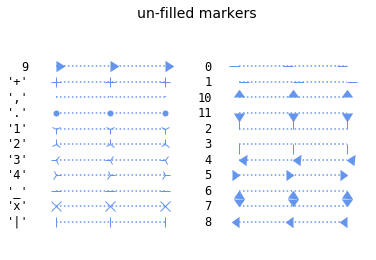

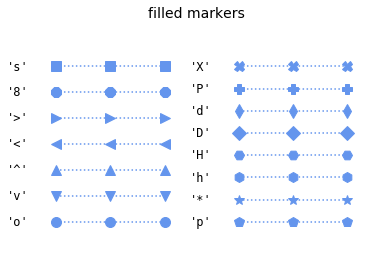

In [20]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()

def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3
unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                    if func != 'nothing' and m not in Line2D.filled_markers]
# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.
unfilled_markers = sorted(unfilled_markers,
                          key=lambda x: (str(type(x)), str(x)))[::-1]
for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('un-filled markers', fontsize=14)

# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

### Plots and subplots

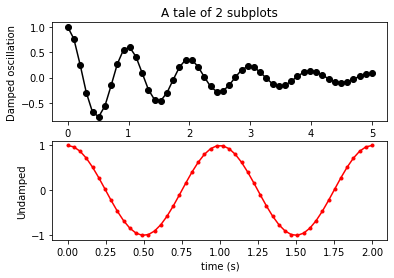

In [22]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1/2)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
#plt.plot(x1, y1, 'ko-')
plt.plot(x1, y1, color='black', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

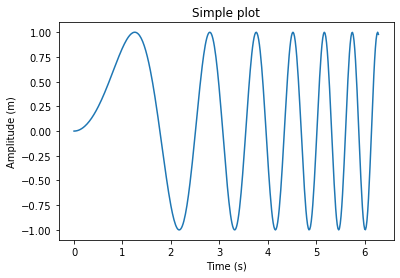

In [23]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()

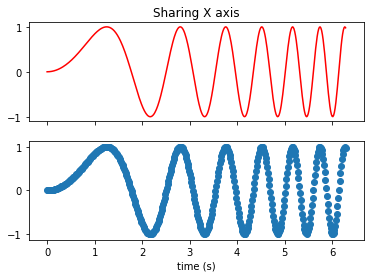

In [24]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y,'r')
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
axarr[1].set_xlabel('time (s)')
plt.show()

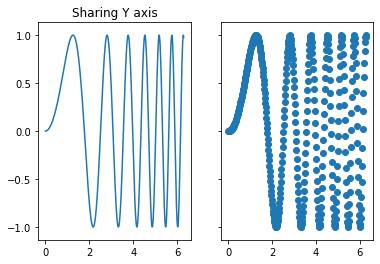

In [25]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

plt.show()

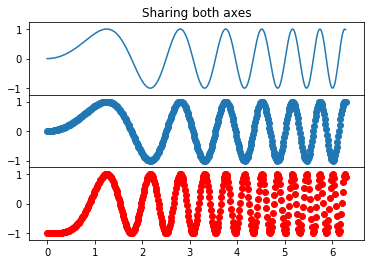

In [30]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

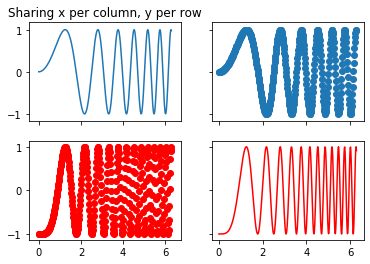

In [31]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

plt.show()

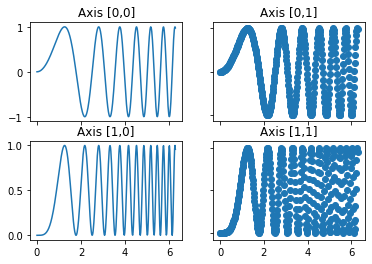

In [32]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

### Histogramming 
This will be used extensively when we do statistics

[112.42888902 117.05924621 121.68960341 126.3199606  130.95031779
 135.58067498 140.21103217 144.84138937 149.47174656 154.10210375
 158.73246094 163.36281813 167.99317533 172.62353252 177.25388971
 181.8842469  186.51460409 191.14496128 195.77531848 200.40567567
 205.03603286 209.66639005 214.29674724 218.92710444 223.55746163
 228.18781882 232.81817601 237.4485332  242.0788904  246.70924759
 251.33960478 255.96996197 260.60031916 265.23067635 269.86103355
 274.49139074 279.12174793 283.75210512 288.38246231 293.01281951
 297.6431767 ]


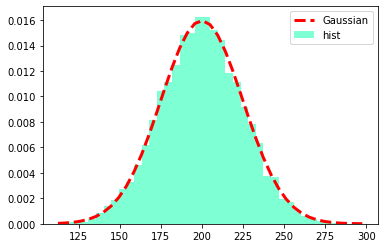

In [48]:
from pylab import *
from scipy.stats import norm

mu = 200
sigma = 25
x = mu + sigma*randn(10000)

n, bins, patches = hist(x, 40, density=True, color='aquamarine')
print(bins)
lines = plot(bins, norm.pdf(bins, mu, sigma), 'r--', label='fit', linewidth=3)
foo = legend([lines[0], patches[0]], ['Gaussian', 'hist'])

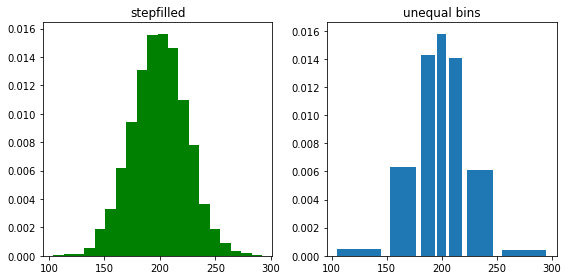

In [51]:
"""
Demo of the histogram (hist) function with different ``histtype`` settings.

* Histogram with step curve that has a color fill.
* Histogram with with unequal bin widths.

"""
import numpy as np
import matplotlib.pyplot as plt

mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g')
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

### For fun: 3d plotting

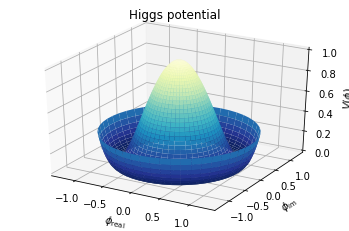

In [52]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_title('Higgs potential')
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

### More information
We will cover plotting in the workshops. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples", where much of this code has come from

## Input and Output

Most of the time, your code will need to process external data -- either entered by a human (through a keyboard), or read from external media. *This is an example abstraction*: you write generic code that is kept separately from the data. 

Let's look at some basic examples

#### Keyboard prompt

In [59]:
s = input('Enter a simple arithmetic problem ')
x=eval(s)
print(x)
print(len(s))
print (type(s), "The answer to your problem,", s,", is ",x)

Enter a simple arithmetic problem 1+17
18
4
<class 'str'> The answer to your problem, 1+17 , is  18


You may want to convert strings to numerical types in order to perform calculations. See 

In [61]:
age = input('What is your age ? ')
print (type(age))
number = int(age)
print (type(number), number)
nextYear = number+1
print('Next year you will be',nextYear)

What is your age ? 5
<class 'str'>
<class 'int'> 5
Next year you will be 6


Slightly more flexible (but also more dangerous) way to do conversion is to use <tt>eval()</tt>
Dangerous because there are simple strings that will cause all the files on your computer to be deleted.
I won't type an example here because I do not want anyone to accidentally evaluate it.

In [31]:
import numpy as np
x = 5
age = input('What is your age ? ')
number = eval(age)
print (type(number), number)

What is your age ? np.pi+3
<class 'float'> 6.141592653589793


Most often, you would want to enter several values and parse them. Use string method *split()*:
But pay attention: the parsing is pretty rudimantary ! (examples)

In [34]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = s.split(',')
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))

Enter coordinates (x,y,z):56,99,11
x= 56 y= 99 z= 11
<class 'str'> <class 'str'> <class 'str'>


Sometimes you would want to convert to float or int immediately, so can use list comprehension:

In [36]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = [float(var) for var in (s.split(','))]
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))
print('x squared = ',x**2)

Enter coordinates (x,y,z):34,66,-10
x= 34.0 y= 66.0 z= -10.0
<class 'float'> <class 'float'> <class 'float'>
x squared =  1156.0


#### Formatted output

In [38]:
for x in range(1, 11):
    print (repr(x).rjust(2), repr(x*x).rjust(3),repr(x*x*x).rjust(4))    # right justification of strings

 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000


You can also zero-pad numbers, e.g. 

In [67]:
print ('-3.14'.zfill(7))

-003.14


In [43]:
import math
s = 'pi = {0:16.3e}'.format(math.pi)
print(s)
#print ('The value of PI is approximately {0:07.3f}, but you can also output more digits: {1}'.format(math.pi,math.pi))

pi =        3.142e+00


In [44]:
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x{0:x}'.format(i))

Enter integer: 137
The hex representation of the integer is 0x89


For those of you familiar with C (and its *sprintf()* function), you can use old-style formating in python:

In [71]:
print ('The value of PI is approximately %7.3e.' % math.pi)
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x%x' % i)

The value of PI is approximately 3.142e+00.
Enter integer: 120
The hex representation of the integer is 0x78


### Reading and writing files

Most often, you would want to read a large dataset, and would want to read it from an external medium. Simplest case is a file on your local disk. Use *open()* function. It returns a file object, and is most commonly used with two arguments: *open(filenamne,mode)*:

In [48]:
%ls

Homework03.ipynb           colors.pdf
Lecture03.ipynb*           wind.data*
Workshop05.ipynb           wind.desc*
Workshop05_optional.ipynb*


In [52]:
%ls

f = open('test3.txt', 'w')
print (f)
f.write('Write a line\n')
f.write('Write another line\n')
f.write('Write a number here: ')
f.write(repr(1))
f.write('more and more and more')
f.write('print this line please \n')
#f.write('\n')   # end line (good practice)
f.close()

#%ls

#%cat test.txt

Homework03.ipynb           colors.pdf
Lecture03.ipynb*           test3.txt
Workshop05.ipynb           wind.data*
Workshop05_optional.ipynb* wind.desc*
<_io.TextIOWrapper name='test3.txt' mode='w' encoding='US-ASCII'>


24

In [53]:
f.write('some more\n')
f.close()

Most commonly, you would want to write columns of data:

In [57]:
import numpy as np
f = open('test.txt', 'w')
for x in np.arange(0,10,0.1):
    f.write('{0:f}\t {1:f}\t {2:f}\n'.format(x,x**2,-x**3))
f.close()

%cat test.txt

0.000000	 0.000000	 -0.000000
0.100000	 0.010000	 -0.001000
0.200000	 0.040000	 -0.008000
0.300000	 0.090000	 -0.027000
0.400000	 0.160000	 -0.064000
0.500000	 0.250000	 -0.125000
0.600000	 0.360000	 -0.216000
0.700000	 0.490000	 -0.343000
0.800000	 0.640000	 -0.512000
0.900000	 0.810000	 -0.729000
1.000000	 1.000000	 -1.000000
1.100000	 1.210000	 -1.331000
1.200000	 1.440000	 -1.728000
1.300000	 1.690000	 -2.197000
1.400000	 1.960000	 -2.744000
1.500000	 2.250000	 -3.375000
1.600000	 2.560000	 -4.096000
1.700000	 2.890000	 -4.913000
1.800000	 3.240000	 -5.832000
1.900000	 3.610000	 -6.859000
2.000000	 4.000000	 -8.000000
2.100000	 4.410000	 -9.261000
2.200000	 4.840000	 -10.648000
2.300000	 5.290000	 -12.167000
2.400000	 5.760000	 -13.824000
2.500000	 6.250000	 -15.625000
2.600000	 6.760000	 -17.576000
2.700000	 7.290000	 -19.683000
2.800000	 7.840000	 -21.952000
2.900000	 8.410000	 -24.389000
3.000000	 9.000000	 -27.000000
3.100000	 9.610000	 -29.791000
3.200000	 10.240000	 -32.76800

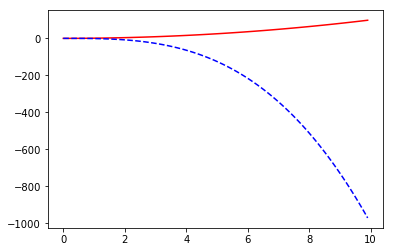

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x, x2, x3 = np.loadtxt('test.txt', unpack = True)
#print(x,x2,x3)
plt.plot(x,x2,'r-',x,x3,'b--')
plt.show()

There is also a more direct, less polished interface for reading data from a file:

In [61]:
f = open('test.txt', 'r')    # open file for reading
#f.write('Try me\n')
s = f.readline()             # read one line (including end-of-line character, '\n')
print (s)                      # print it

0.000000	 0.000000	 -0.000000



In [63]:
s2 = f.readline()            # this will now read the second line
print (s2)

0.200000	 0.040000	 -0.008000



In [64]:
f = open('test.txt', 'rb') # opening the file again will reset the handle to the beginning of the file.NB: binary mode !
f.seek(5)                  # skip 5 bytes (5 characters)
s2 = f.readline()          # read from that point until the end of the line
print (s2)                 # notice trancation 
f.seek(-10, 1)             # go back 10 bytes from the current position (i.e. beginning of next line)
s2 = f.readline()          # notice what is read
print (s2)
f.seek?

b'000\t 0.000000\t -0.000000\n'
b'-0.000000\n'
